<a href="https://colab.research.google.com/github/kulsum381/Iris-flower-classification/blob/main/Copy_of_kulsum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Corrected typo here
import seaborn as sns
import pandas as pd
%matplotlib inline

loading the dataset

In [ ]:
# loading the dataset
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class_labels']

# Update the file path to the correct location of 'iris.data'
# Replace 'path/to/your/data/iris.data' with the actual path
df = pd.read_csv('iris.csv', names=columns)

df.head(150)

,sepal length,sepal width,petal length,petal width,class_labels
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
...,...,...,...,...,...
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


visualization of our dataset


In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal length  151 non-null    object
 1   sepal width   151 non-null    object
 2   petal length  151 non-null    object
 3   petal width   151 non-null    object
 4   class_labels  151 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB
None


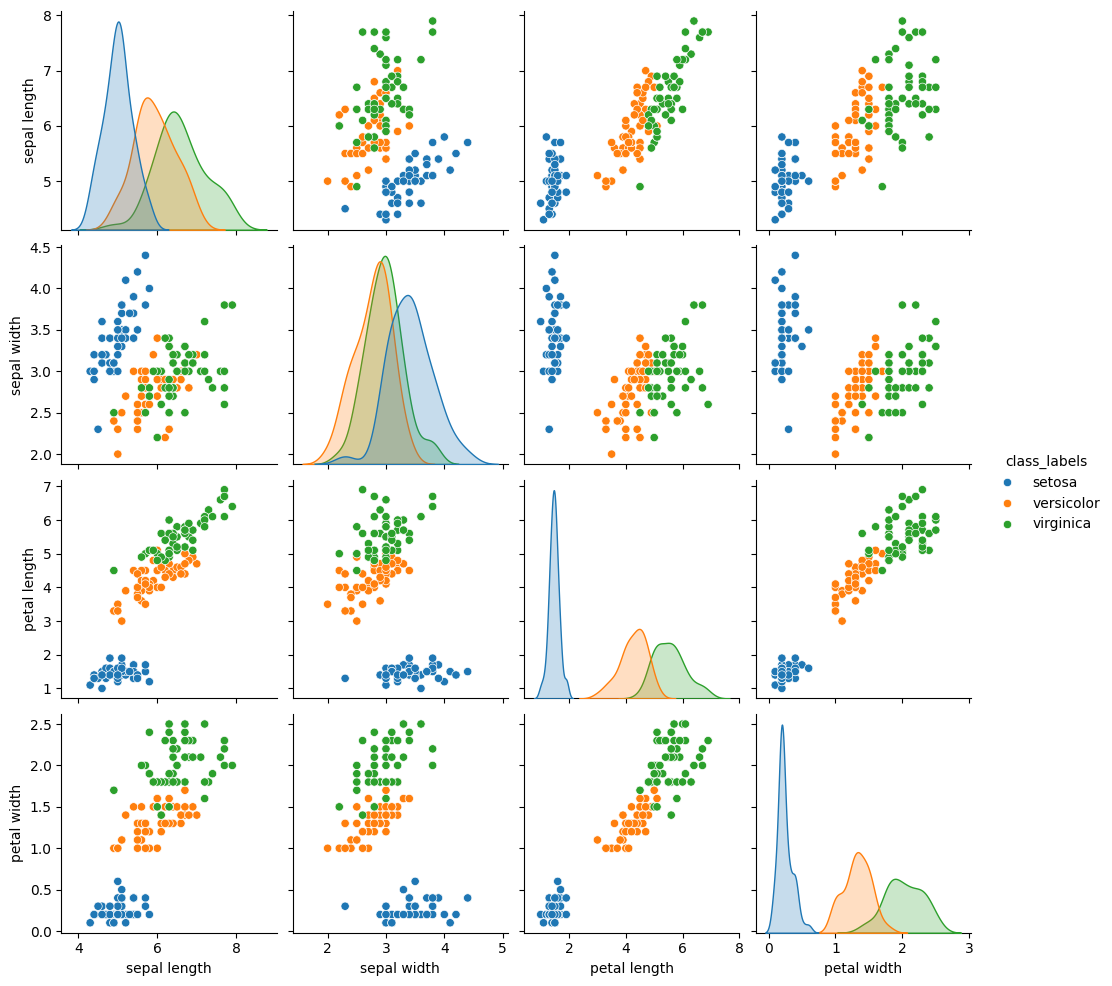

In [ ]:
# Check the data types of the columns
print(df.info())

# Convert the numerical columns to numeric types, coercing errors
# This will turn any values that cannot be converted to numbers into NaN
for col in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where the numerical columns contain NaN values after coercion
# Alternatively, you could handle NaN values in a different way (e.g., imputation)
df.dropna(subset=['sepal length', 'sepal width', 'petal length', 'petal width'], inplace=True)

# Now try plotting again
sns.pairplot(df, hue='class_labels')

SEPERATING INPUT COLUMNS AND OUTPUT COLUMNS

In [ ]:
data = df.values

X= data[: , 0:4]
Y= data[: , 4]

SPLITTING THE DATA INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train)

[[5.5 3.5 1.3 0.2]
 [7.0 3.2 4.7 1.4]
 [5.4 3.9 1.7 0.4]
 [6.3 2.7 4.9 1.8]
 [7.2 3.6 6.1 2.5]
 [6.3 3.3 4.7 1.6]
 [4.8 3.4 1.9 0.2]
 [7.4 2.8 6.1 1.9]
 [5.8 2.7 5.1 1.9]
 [6.4 2.8 5.6 2.1]
 [6.1 2.6 5.6 1.4]
 [4.7 3.2 1.3 0.2]
 [6.1 3.0 4.6 1.4]
 [4.3 3.0 1.1 0.1]
 [5.0 3.4 1.6 0.4]
 [5.4 3.7 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [6.1 2.8 4.7 1.2]
 [5.7 2.8 4.5 1.3]
 [5.6 3.0 4.1 1.3]
 [6.4 3.2 5.3 2.3]
 [5.1 3.5 1.4 0.2]
 [7.2 3.0 5.8 1.6]
 [5.8 2.8 5.1 2.4]
 [5.4 3.4 1.5 0.4]
 [5.3 3.7 1.5 0.2]
 [6.7 3.3 5.7 2.1]
 [5.7 2.9 4.2 1.3]
 [5.9 3.0 5.1 1.8]
 [5.5 2.4 3.7 1.0]
 [6.6 3.0 4.4 1.4]
 [6.7 3.0 5.2 2.3]
 [5.2 4.1 1.5 0.1]
 [6.1 2.8 4.0 1.3]
 [5.0 2.0 3.5 1.0]
 [5.6 2.7 4.2 1.3]
 [5.8 2.7 4.1 1.0]
 [4.6 3.1 1.5 0.2]
 [5.7 2.5 5.0 2.0]
 [6.2 2.2 4.5 1.5]
 [5.4 3.4 1.7 0.2]
 [5.6 3.0 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.7 3.3 5.7 2.5]
 [6.4 2.7 5.3 1.9]
 [5.1 3.7 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 2.5 3.0 1.1]
 [5.1 3.8 1.9 0.4]
 [6.0 2.7 5.1 1.6]
 [6.3 2.5 5.0 1.9]
 [6.2 2.8 4.8 1.8]
 [6.8 3.2 5.

SUPPORT VECTOR MACHINE

In [ ]:
# Support vector machine algorithm

# Support vector machine algorithm

from sklearn.svm import SVC

model_svc = SVC()

# Corrected the variable name from y_train to Y_train
model_svc.fit(X_train, Y_train)

SVC()

In [ ]:
predictionl = model_svc.predict(X_test)

#Calculate the accuracy

from sklearn.metrics import accuracy_score

# Corrected the variable name from y_test to Y_test
print(accuracy_score(Y_test, predictionl))

0.9666666666666667


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

# Corrected the variable name from y_train to Y_train
model_LR.fit(X_train, Y_train)

# Corrected the variable name from y_train to Y_train
model_LR.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
prediction2 = model_LR.predict(X_test)

#Calculate the accuracy

prediction2 = model_LR.predict(X_test)

#Calculate the accuracy

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, prediction2)*100)

96.66666666666667


DECISION TREE CLASSIFIER

In [ ]:
# Decision TreeClassifier

from sklearn.tree import DecisionTreeClassifier

model_DTC=DecisionTreeClassifier()

model_DTC.fit(X_train,Y_train)

model_DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
prediction3 = model_svc.predict(X_test)

#Calculate the accuracy

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, prediction3))

0.9666666666666667


In [ ]:
# A detailed classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, prediction2))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
X_new = np.array([[3, 2, 1, 0.2], [ 4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.91]])

#Prediction of the species from the input vector

prediction = model_svc.predict(X_new)

X_new = np.array([[3, 2, 1, 0.2], [ 4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.91]])

#Prediction of the species from the input vector

prediction = model_svc.predict(X_new)

print("Prediction of Species: {}".format(prediction))

prediction = model_svc.predict(X_new)

print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['setosa' 'versicolor' 'versicolor']
Prediction of Species: ['setosa' 'versicolor' 'versicolor']
